# 4.Data Exploration & Pre-processing

In [113]:
#Dataset shape
clean_df.shape

(12997, 39)

In [19]:
#Dataset info 
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12997 entries, 0 to 15235
Data columns (total 39 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Federal Provider Number                                                                            12997 non-null  object 
 1   Provider Name                                                                                      12997 non-null  object 
 2   Number of Certified Beds                                                                           12997 non-null  int64  
 3   Average Number of Residents per Day                                                                12973 non-null  float64
 4   Total nursing staff turnover                                                                       11052 non-null  flo

Both Total nursing staff turnover and Registered Nurse turnover attributes have a large, but acceptable number of nulls from 1000-2000 rows. 

In [20]:
#Describe dataset 
clean_df.describe()
# .to_csv("DescribeDataset.csv")

,Number of Certified Beds,Average Number of Residents per Day,Total nursing staff turnover,Registered Nurse turnover,Adjusted Nurse Aide Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,...,COVID-19 Deaths Per Occupied Beds,Number of outpatient emergency department visits per 1000 long-stay resident days,Ownership Type_0,Ownership Type_1,Ownership Type_2,Long-Stay QM Rating_1.0,Long-Stay QM Rating_2.0,Long-Stay QM Rating_3.0,Long-Stay QM Rating_4.0,Long-Stay QM Rating_5.0
count,12997.000000,12973.000000,11052.000000,10350.000000,12645.000000,12645.000000,12645.000000,12997.000000,12997.000000,12993.000000,...,12900.000000,12997.000000,12997.000000,12997.000000,12997.000000,12997.000000,12997.000000,12997.000000,12997.000000,12997.000000
mean,113.143649,81.455230,51.273127,49.536705,2.171593,0.870455,0.675686,1.539432,4.832808,1.357269,...,0.003258,0.701247,0.221282,0.713549,0.065169,0.091790,0.149034,0.174733,0.222282,0.353081
std,59.809910,46.666475,15.068248,21.247156,0.584521,0.339521,0.403360,3.578529,9.157541,2.368291,...,0.004708,0.480244,0.415126,0.452120,0.246833,0.288741,0.356136,0.379753,0.415796,0.477946
min,18.000000,1.000000,6.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,51.000000,40.900000,33.300000,1.788230,0.648650,0.400500,0.000000,0.000000,0.000000,...,0.000313,0.364782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104.000000,73.700000,50.700000,50.000000,2.110130,0.853320,0.585050,0.000000,2.000000,1.000000,...,0.002016,0.595768,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,132.000000,99.300000,60.900000,64.000000,2.495520,1.073060,0.855110,2.000000,5.000000,2.000000,...,0.004805,0.922189,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,874.000000,703.300000,100.000000,100.000000,6.903020,3.636150,5.580270,72.000000,162.000000,43.000000,...,0.263780,5.477409,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Distributions

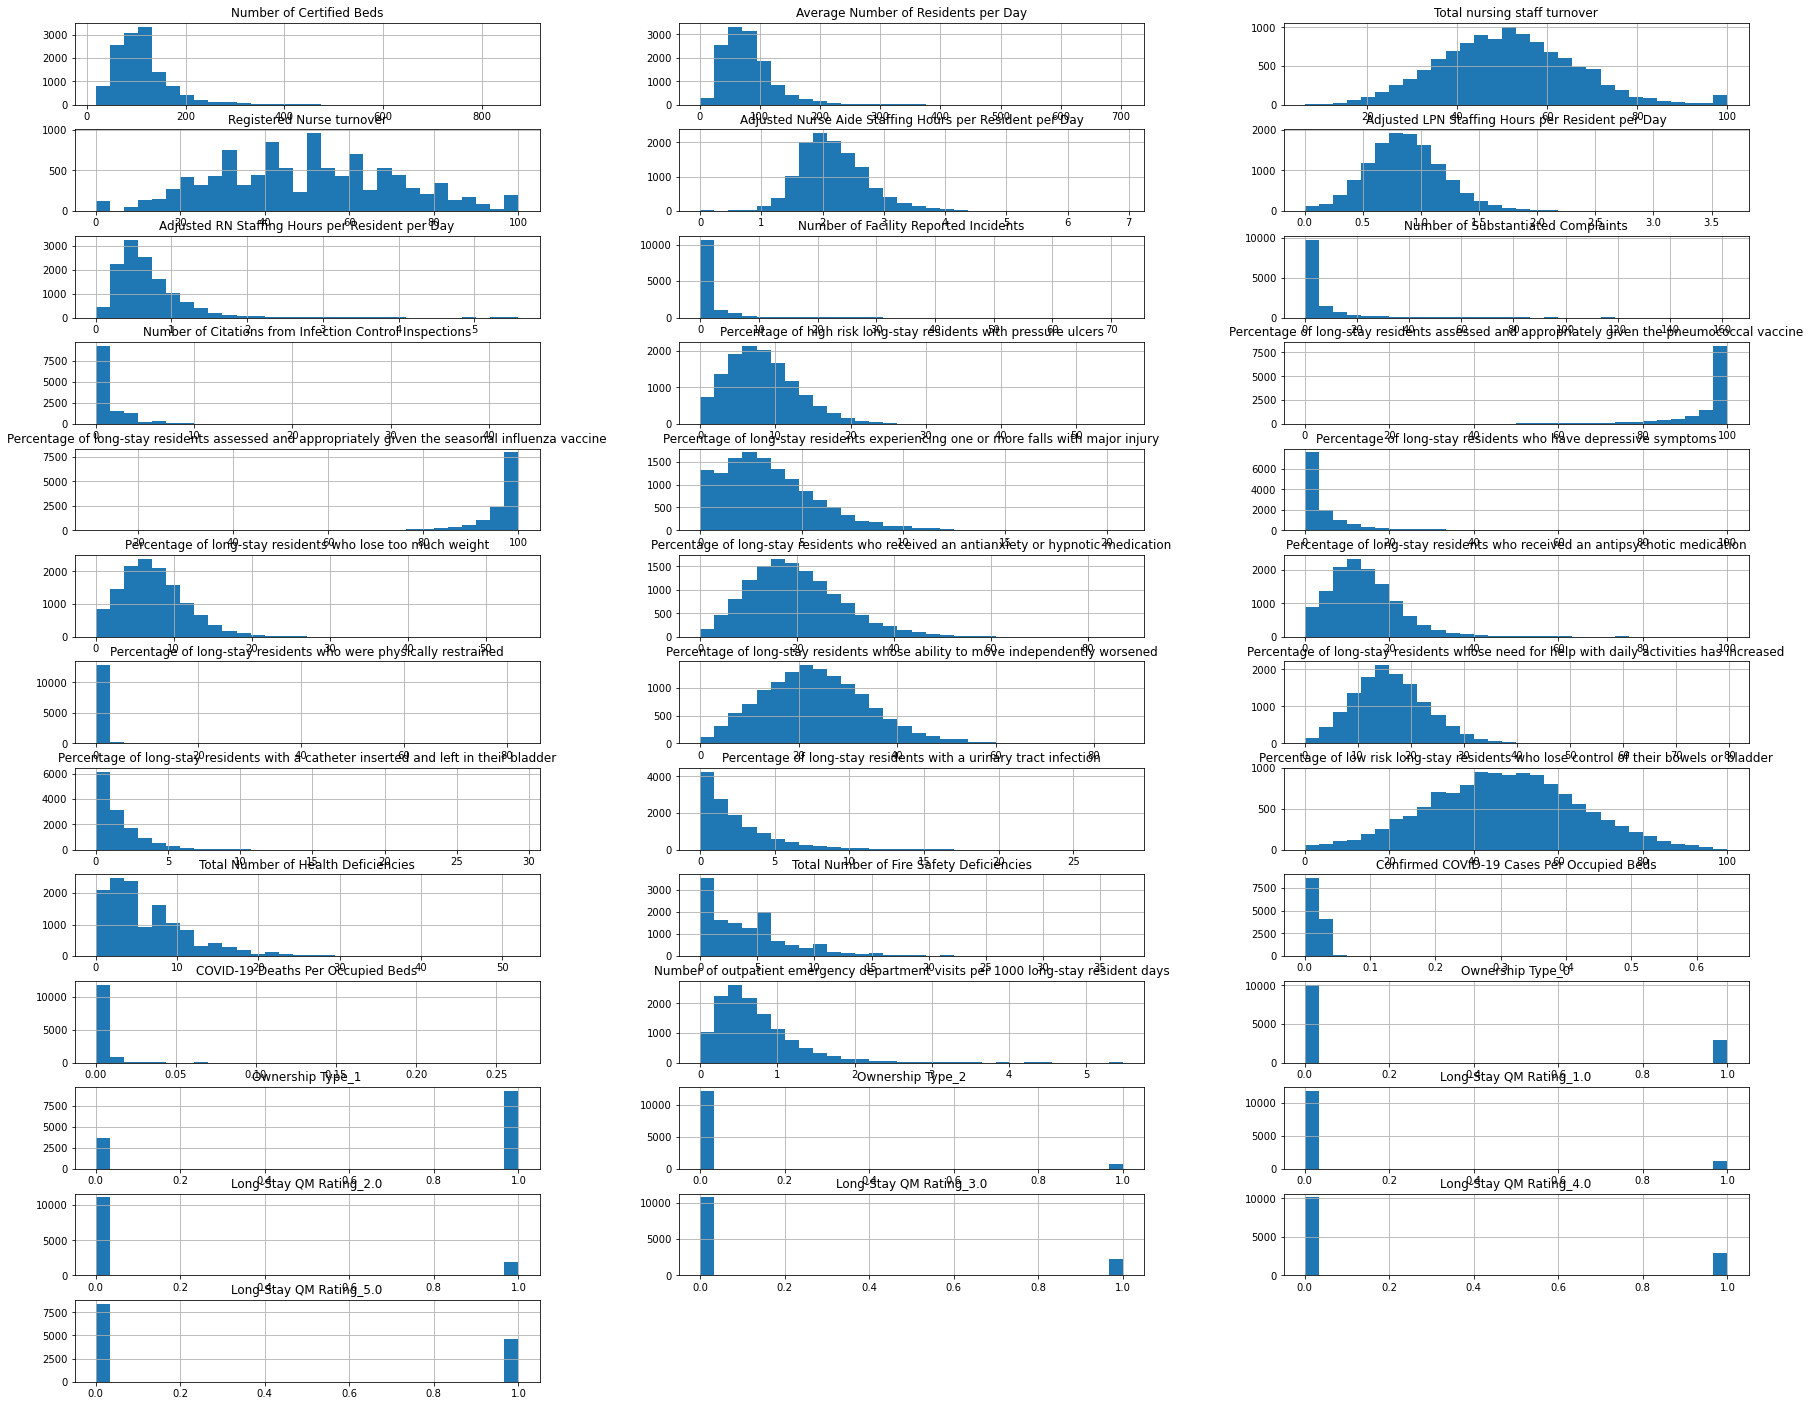

In [29]:
# Visualize distributions
clean_df.hist(bins=30, figsize=(30,25), layout=(13,3));

On visual inspection, it can be noted that ~15 plots are approximately normally distributed, however a number of attributes are not normally distributed or have notably long right- or left-tails. This will be further addressed in assumption testing.

## Outlier Detection

Since the data was manually reported by nursing homes regarding their performance, a cautious approach will be taken for outlier detection and removal. 

<ipython-input-23-e1c281880675>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


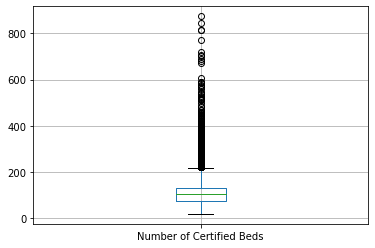

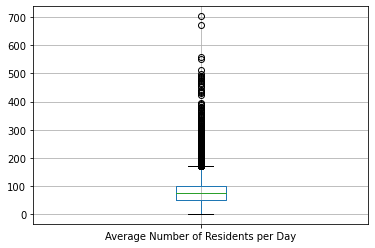

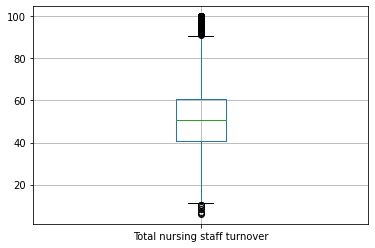

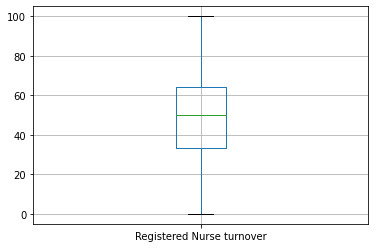

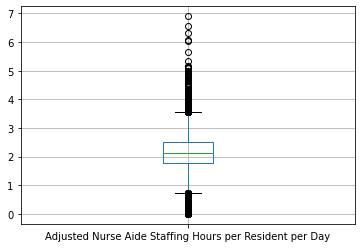

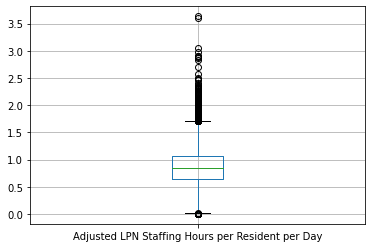

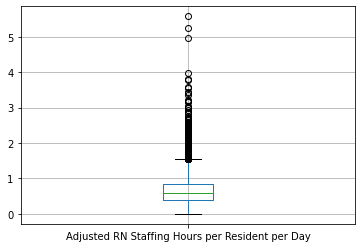

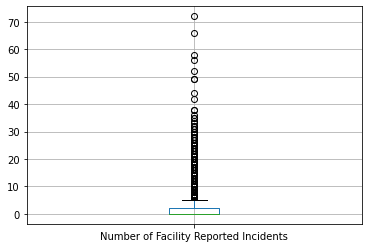

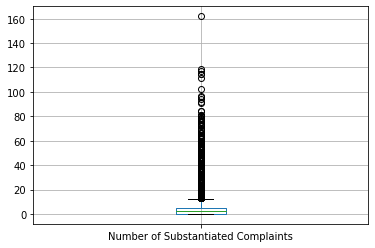

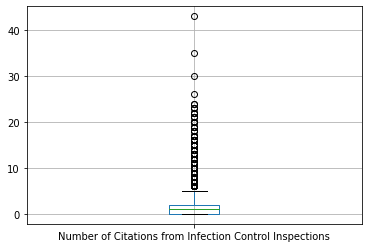

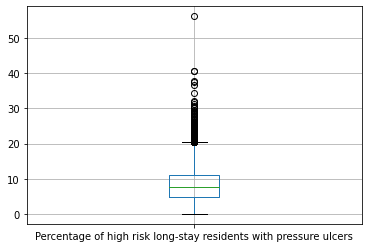

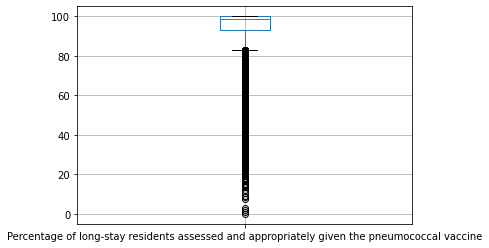

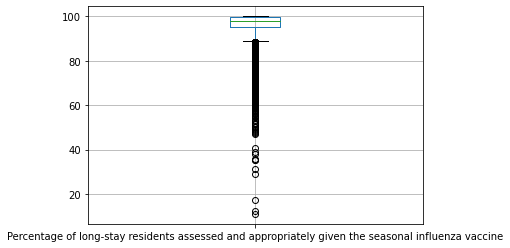

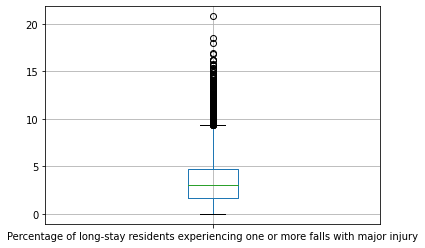

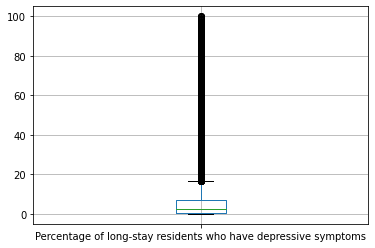

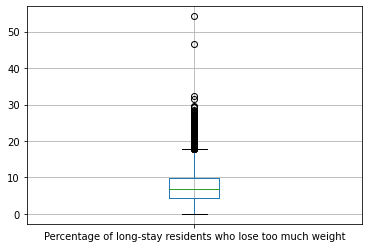

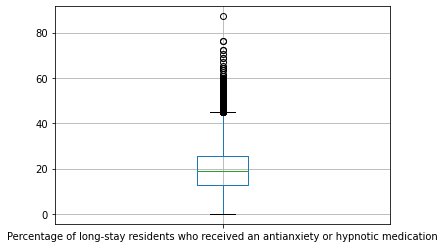

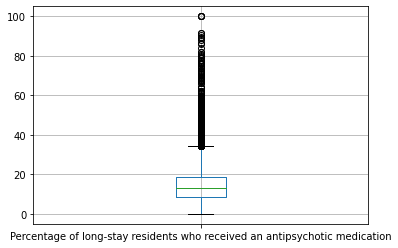

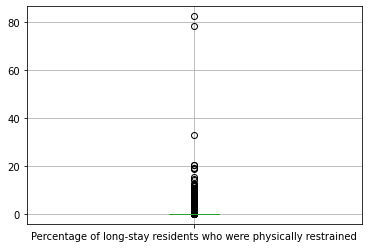

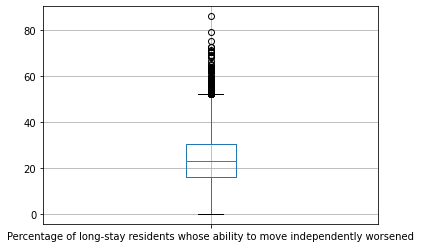

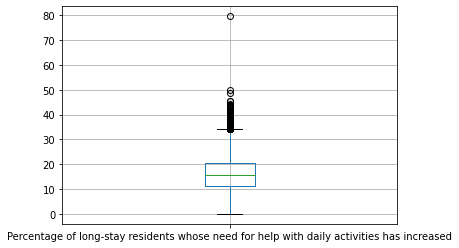

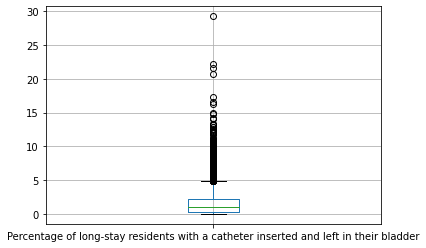

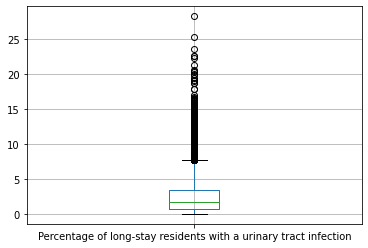

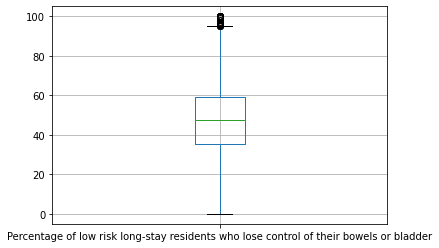

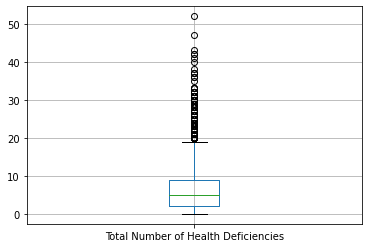

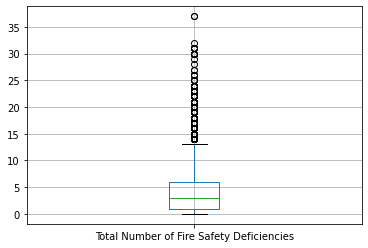

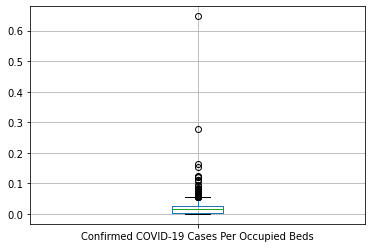

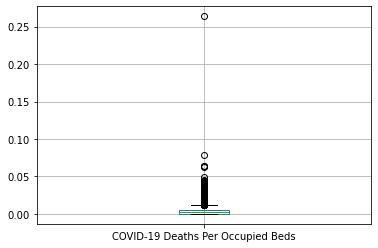

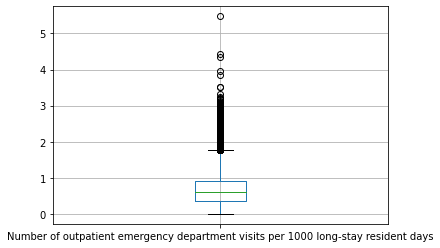

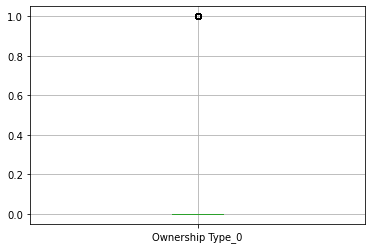

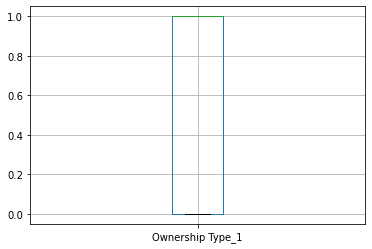

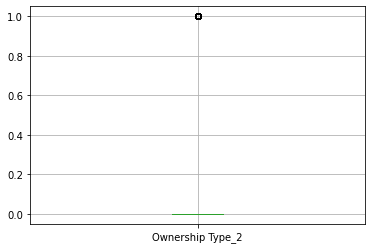

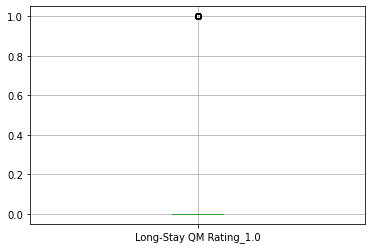

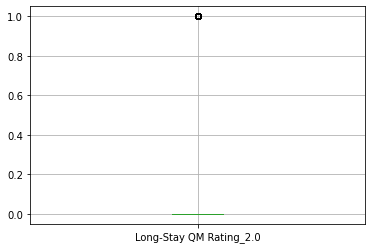

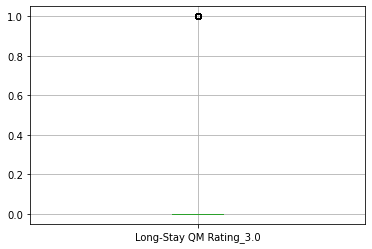

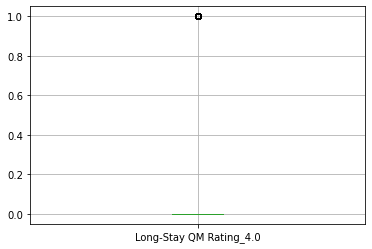

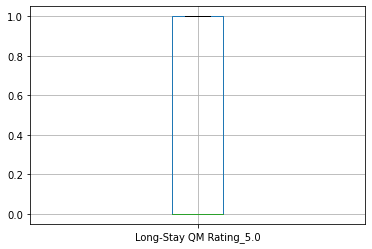

In [23]:
#Visualizing outliers 
outlier_df = clean_df.drop(['Federal Provider Number', 'Provider Name'], axis=1).copy()
for i in outlier_df:
    plt.figure()
    outlier_df.boxplot([i])

On visual analysis, there are a varying amount of outliers in each attribute, however the majority of attributes have outliers on one-tail, resulting in skew. To quantify this, the skewness will be calculated below:

In [24]:
#Evaluating skewness of attributes 
outlier_df.skew()

Number of Certified Beds                                                                              2.814405
Average Number of Residents per Day                                                                   2.784565
Total nursing staff turnover                                                                          0.356678
Registered Nurse turnover                                                                             0.149541
Adjusted Nurse Aide Staffing Hours per Resident per Day                                               0.709330
Adjusted LPN Staffing Hours per Resident per Day                                                      0.584469
Adjusted RN Staffing Hours per Resident per Day                                                       1.922657
Number of Facility Reported Incidents                                                                 5.765617
Number of Substantiated Complaints                                                                    4.545777
N

There is a significant amount of skew in 9 numeric attributes. To address this, right-skewed attributes values with a skew > 3 greater will have values greater than the 90th percentile replaced by the median. Left-skewed values with a skew < -3 will have values less than the 10th percentile replaced by the median. Categorical dummy variables will not be included.

In [25]:
#Addressing skew and testing resulting skewness 
Q10 = outlier_df.quantile(0.1)
Q50 = outlier_df.quantile(0.5)
Q90 = outlier_df.quantile(0.9)
outlier_df['Number of Facility Reported Incidents'] = np.where(outlier_df['Number of Facility Reported Incidents'] > Q90['Number of Facility Reported Incidents'], Q50['Number of Facility Reported Incidents'], outlier_df['Number of Facility Reported Incidents'])
outlier_df['Number of Substantiated Complaints'] = np.where(outlier_df['Number of Substantiated Complaints'] > Q90['Number of Substantiated Complaints'], Q50['Number of Substantiated Complaints'], outlier_df['Number of Substantiated Complaints'])
outlier_df['Number of Citations from Infection Control Inspections'] = np.where(outlier_df['Number of Citations from Infection Control Inspections'] > Q90['Number of Citations from Infection Control Inspections'], Q50['Number of Citations from Infection Control Inspections'], outlier_df['Number of Citations from Infection Control Inspections'])
outlier_df['Percentage of long-stay residents who have depressive symptoms'] = np.where(outlier_df['Percentage of long-stay residents who have depressive symptoms'] > Q90['Percentage of long-stay residents who have depressive symptoms'], Q50['Percentage of long-stay residents who have depressive symptoms'], outlier_df['Percentage of long-stay residents who have depressive symptoms'])
outlier_df['Percentage of long-stay residents who were physically restrained'] = np.where(outlier_df['Percentage of long-stay residents who were physically restrained'] > Q90['Percentage of long-stay residents who were physically restrained'], Q50['Percentage of long-stay residents who were physically restrained'], outlier_df['Percentage of long-stay residents who were physically restrained'])
outlier_df['Confirmed COVID-19 Cases Per Occupied Beds'] = np.where(outlier_df['Confirmed COVID-19 Cases Per Occupied Beds'] > Q90['Confirmed COVID-19 Cases Per Occupied Beds'], Q50['Confirmed COVID-19 Cases Per Occupied Beds'], outlier_df['Confirmed COVID-19 Cases Per Occupied Beds'])
outlier_df['COVID-19 Deaths Per Occupied Beds'] = np.where(outlier_df['COVID-19 Deaths Per Occupied Beds'] > Q90['COVID-19 Deaths Per Occupied Beds'], Q50['COVID-19 Deaths Per Occupied Beds'], outlier_df['COVID-19 Deaths Per Occupied Beds'])
outlier_df['Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine'] = np.where(outlier_df['Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine'] < Q10['Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine'], Q50['Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine'], outlier_df['Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine'])
outlier_df['Percentage of long-stay residents assessed and appropriately given the seasonal influenza vaccine'] = np.where(outlier_df['Percentage of long-stay residents assessed and appropriately given the seasonal influenza vaccine'] < Q10['Percentage of long-stay residents assessed and appropriately given the seasonal influenza vaccine'], Q50['Percentage of long-stay residents assessed and appropriately given the seasonal influenza vaccine'], outlier_df['Percentage of long-stay residents assessed and appropriately given the seasonal influenza vaccine'])
outlier_df.skew()

Number of Certified Beds                                                                             2.814405
Average Number of Residents per Day                                                                  2.784565
Total nursing staff turnover                                                                         0.356678
Registered Nurse turnover                                                                            0.149541
Adjusted Nurse Aide Staffing Hours per Resident per Day                                              0.709330
Adjusted LPN Staffing Hours per Resident per Day                                                     0.584469
Adjusted RN Staffing Hours per Resident per Day                                                      1.922657
Number of Facility Reported Incidents                                                                1.761081
Number of Substantiated Complaints                                                                   1.596168
Number of 

In [30]:
outlier_df.describe()

,Number of Certified Beds,Average Number of Residents per Day,Total nursing staff turnover,Registered Nurse turnover,Adjusted Nurse Aide Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,...,COVID-19 Deaths Per Occupied Beds,Number of outpatient emergency department visits per 1000 long-stay resident days,Ownership Type_0,Ownership Type_1,Ownership Type_2,Long-Stay QM Rating_1.0,Long-Stay QM Rating_2.0,Long-Stay QM Rating_3.0,Long-Stay QM Rating_4.0,Long-Stay QM Rating_5.0
count,12997.000000,12973.000000,11052.000000,10350.000000,12645.000000,12645.000000,12645.000000,12997.000000,12997.000000,12993.000000,...,12900.000000,12997.000000,12997.000000,12997.000000,12997.000000,12997.000000,12997.000000,12997.000000,12997.000000,12997.000000
mean,113.143649,81.455230,51.273127,49.536705,2.171593,0.870455,0.675686,0.611834,2.417481,0.859309,...,0.002229,0.701247,0.221282,0.713549,0.065169,0.091790,0.149034,0.174733,0.222282,0.353081
std,59.809910,46.666475,15.068248,21.247156,0.584521,0.339521,0.403360,1.054702,3.017783,1.072238,...,0.002134,0.480244,0.415126,0.452120,0.246833,0.288741,0.356136,0.379753,0.415796,0.477946
min,18.000000,1.000000,6.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,51.000000,40.900000,33.300000,1.788230,0.648650,0.400500,0.000000,0.000000,0.000000,...,0.000313,0.364782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104.000000,73.700000,50.700000,50.000000,2.110130,0.853320,0.585050,0.000000,2.000000,1.000000,...,0.002016,0.595768,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,132.000000,99.300000,60.900000,64.000000,2.495520,1.073060,0.855110,1.000000,3.000000,1.000000,...,0.003504,0.922189,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,874.000000,703.300000,100.000000,100.000000,6.903020,3.636150,5.580270,4.000000,13.000000,4.000000,...,0.007999,5.477409,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dataset Normalization

Upon visual analysis of the data description, it is apparently that the scale of the various attributes varies significantly. It is imperative that the data be normalized. 

In [31]:
#Data Normalization using the min-max method 
normalized_df = outlier_df.copy()
for column in normalized_df.columns:
    normalized_df[column] = (normalized_df[column] - normalized_df[column].min())/(normalized_df[column].max() - normalized_df[column].min())

In [32]:
normalized_df.describe()

,Number of Certified Beds,Average Number of Residents per Day,Total nursing staff turnover,Registered Nurse turnover,Adjusted Nurse Aide Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,...,COVID-19 Deaths Per Occupied Beds,Number of outpatient emergency department visits per 1000 long-stay resident days,Ownership Type_0,Ownership Type_1,Ownership Type_2,Long-Stay QM Rating_1.0,Long-Stay QM Rating_2.0,Long-Stay QM Rating_3.0,Long-Stay QM Rating_4.0,Long-Stay QM Rating_5.0
count,12997.000000,12973.000000,11052.000000,10350.000000,12645.000000,12645.000000,12645.000000,12997.000000,12997.000000,12993.000000,...,12900.000000,12997.000000,12997.000000,12997.000000,12997.000000,12997.000000,12997.000000,12997.000000,12997.000000,12997.000000
mean,0.111149,0.114560,0.481077,0.495367,0.314586,0.239389,0.121085,0.152958,0.185960,0.214827,...,0.278669,0.128025,0.221282,0.713549,0.065169,0.091790,0.149034,0.174733,0.222282,0.353081
std,0.069871,0.066448,0.160471,0.212472,0.084676,0.093374,0.072283,0.263675,0.232137,0.268059,...,0.266738,0.087677,0.415126,0.452120,0.246833,0.288741,0.356136,0.379753,0.415796,0.477946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.065421,0.071195,0.370607,0.333000,0.259050,0.178389,0.071771,0.000000,0.000000,0.000000,...,0.039065,0.066598,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.100467,0.103517,0.474973,0.500000,0.305682,0.234677,0.104843,0.000000,0.153846,0.250000,...,0.252043,0.108768,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.133178,0.139969,0.583600,0.640000,0.361511,0.295109,0.153238,0.250000,0.230769,0.250000,...,0.438009,0.168362,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dataset is normalized to [0,1]